In [2]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

pd.options.display.max_columns = None
pd.set_option('display.max_rows', 150)

In [2]:
def open_file(path='', eng=None, backed=False, key='', multiple=False, multiple_value=0.0, lat=0, lon=0):
    if backed==True:
        ds = xr.open_dataset(path, engine=eng, backend_kwargs={'filter_by_keys': {'shortName': key}})
    else: ds = xr.open_dataset(path, engine=eng)
        
    gpi_bidim = ds.to_dataframe()

    # print and checks
    print(gpi_bidim)
    print(gpi_bidim.step.unique())
    print(gpi_bidim.number.unique())
    if 'isobaricInhPa' in gpi_bidim.columns: print(gpi_bidim.isobaricInhPa.unique())
    
    # reload and see number of data
    if backed==True:
        ds = xr.open_dataset(path, engine=eng, backend_kwargs={'filter_by_keys': {'shortName': key}})
    else: ds = xr.open_dataset(path, engine=eng)
    gpi_bidim = ds.to_dataframe()
    gpi_bidim = gpi_bidim.reset_index()
    if multiple is False: 
        gpi_bidim = gpi_bidim.loc[:,['time','latitude','longitude',key]]
    else: 
        gpi_bidim = gpi_bidim.loc[gpi_bidim.isobaricInhPa==multiple_value,['time','latitude','longitude',key]]

    res = gpi_bidim.groupby(['time']).count()
    print(res)
    print(res.loc[res[key]!=10512])
    
    # plot di un punto ogni giorno
    plt.plot(gpi_bidim.loc[(gpi_bidim.latitude==lat) & (gpi_bidim.longitude==lon),key].reset_index(drop=True))
    
    # check 
    print(gpi_bidim.loc[(gpi_bidim.latitude==lat) & (gpi_bidim.longitude==lon),:])

# 1) gpi.grb

Dati giornalieri, uno per ciascuna combinazione latitudine-longitudine (10.512 diverse, granularità 2.5 gradi).
Ho plottato tutti i giorni del 2020 all'equatore (punto 0,0).
6 Variabili: vo, r, u (850), u(200), v(850), v(200).


                               number   step  isobaricInhPa valid_time  \
time       latitude longitude                                            
1980-01-01  90.0    -180.0          0 0 days          850.0 1980-01-01   
                    -177.5          0 0 days          850.0 1980-01-01   
                    -175.0          0 0 days          850.0 1980-01-01   
                    -172.5          0 0 days          850.0 1980-01-01   
                    -170.0          0 0 days          850.0 1980-01-01   
...                               ...    ...            ...        ...   
1980-12-31 -90.0     167.5          0 0 days          850.0 1980-12-31   
                     170.0          0 0 days          850.0 1980-12-31   
                     172.5          0 0 days          850.0 1980-12-31   
                     175.0          0 0 days          850.0 1980-12-31   
                     177.5          0 0 days          850.0 1980-12-31   

                                     

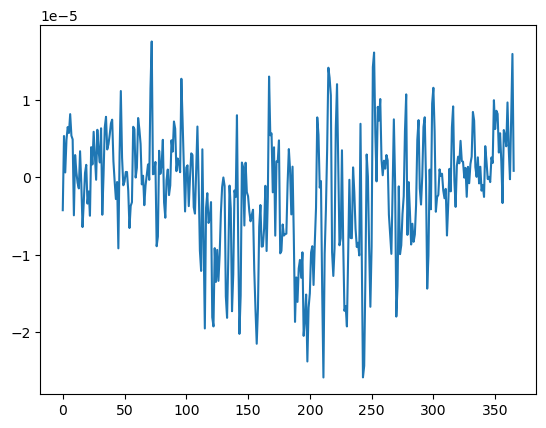

In [4]:
open_file(path="/Users/paolo/Documents/TC_old/data/data_new_samples/19800101_19801231.grb", eng='cfgrib', backed=True, key='vo')


In [2]:
def op(path='', eng=None, backed=False, key='', multiple=False, multiple_value=0.0, lat=0, lon=0):
    if backed==True:
        ds = xr.open_dataset(path, engine=eng, backend_kwargs={'filter_by_keys': {'shortName': key}})
    else: ds = xr.open_dataset(path, engine=eng)
        
    gpi_bidim = ds.to_dataframe()
    #gpi_bidim = gpi_bidim.reset_index()
    print(gpi_bidim)
    #gpi_bidim = gpi_bidim.loc[gpi_bidim.isobaricInhPa==200]
    return gpi_bidim
df_2015 = op(path="/Users/paolo/Documents/TC_old/data/data_new_samples/20150101_20151231.grb", eng='cfgrib', backed=True, key='r')
df = op(path="/Users/paolo/Documents/TC_old/data/data_new_samples/20190101_20191231.grb", eng='cfgrib', backed=True, key='r')

#df = op(path="/Users/paolo/Documents/TC_old/data/data_new_samples/2d_sst_trop_20150101_20151231.grb", eng='cfgrib', backed=False)
df


                               number   step  isobaricInhPa valid_time  \
time       latitude longitude                                            
2015-01-01  90.0    -180.0          0 0 days          700.0 2015-01-01   
                    -177.5          0 0 days          700.0 2015-01-01   
                    -175.0          0 0 days          700.0 2015-01-01   
                    -172.5          0 0 days          700.0 2015-01-01   
                    -170.0          0 0 days          700.0 2015-01-01   
...                               ...    ...            ...        ...   
2015-12-31 -90.0     167.5          0 0 days          700.0 2015-12-31   
                     170.0          0 0 days          700.0 2015-12-31   
                     172.5          0 0 days          700.0 2015-12-31   
                     175.0          0 0 days          700.0 2015-12-31   
                     177.5          0 0 days          700.0 2015-12-31   

                                     

number   step  isobaricInhPa valid_time  \
time       latitude longitude                                            
2019-01-01  90.0    -180.0          0 0 days          700.0 2019-01-01   
                    -177.5          0 0 days          700.0 2019-01-01   
                    -175.0          0 0 days          700.0 2019-01-01   
                    -172.5          0 0 days          700.0 2019-01-01   
                    -170.0          0 0 days          700.0 2019-01-01   
...                               ...    ...            ...        ...   
2019-12-31 -90.0     167.5          0 0 days          700.0 2019-12-31   
                     170.0          0 0 days          700.0 2019-12-31   
                     172.5          0 0 days          700.0 2019-12-31   
                     175.0          0 0 days          700.0 2019-12-31   
                     177.5          0 0 days          700.0 2019-12-31   

                                       r  
time       latitude longitude             
2019-01-01  90.0    -180.0     89.069725  
                    -177.5     89.586502  
                    -175.0     90.109711  
                    -172.5     90.613525  
                    -170.0     91.076614  
...                                  ...  
2019-12-31 -90.0     167.5     96.035049  
                     170.0     95.904640  
                     172.5     95.756424  
                     175.0     95.589607  
                     177.5     95.402489  

[3836880 rows x 5 columns]

In [3]:
from sklearn.preprocessing import StandardScaler
scal = StandardScaler()
df_2015['r'] = scal.fit_transform(df_2015['r'].values.reshape(-1,1))
df['r'] = scal.transform(df['r'].values.reshape(-1,1))
df

number   step  isobaricInhPa valid_time  \
time       latitude longitude                                            
2019-01-01  90.0    -180.0          0 0 days          700.0 2019-01-01   
                    -177.5          0 0 days          700.0 2019-01-01   
                    -175.0          0 0 days          700.0 2019-01-01   
                    -172.5          0 0 days          700.0 2019-01-01   
                    -170.0          0 0 days          700.0 2019-01-01   
...                               ...    ...            ...        ...   
2019-12-31 -90.0     167.5          0 0 days          700.0 2019-12-31   
                     170.0          0 0 days          700.0 2019-12-31   
                     172.5          0 0 days          700.0 2019-12-31   
                     175.0          0 0 days          700.0 2019-12-31   
                     177.5          0 0 days          700.0 2019-12-31   

                                      r  
time       latitude longitude            
2019-01-01  90.0    -180.0     1.240998  
                    -177.5     1.260245  
                    -175.0     1.279732  
                    -172.5     1.298497  
                    -170.0     1.315745  
...                                 ...  
2019-12-31 -90.0     167.5     1.500421  
                     170.0     1.495564  
                     172.5     1.490044  
                     175.0     1.483831  
                     177.5     1.476861  

[3836880 rows x 5 columns]

In [5]:
df[-10512:]

number   step  isobaricInhPa valid_time  \
time       latitude longitude                                            
2019-12-31  90.0    -180.0          0 0 days          700.0 2019-12-31   
                    -177.5          0 0 days          700.0 2019-12-31   
                    -175.0          0 0 days          700.0 2019-12-31   
                    -172.5          0 0 days          700.0 2019-12-31   
                    -170.0          0 0 days          700.0 2019-12-31   
...                               ...    ...            ...        ...   
           -90.0     167.5          0 0 days          700.0 2019-12-31   
                     170.0          0 0 days          700.0 2019-12-31   
                     172.5          0 0 days          700.0 2019-12-31   
                     175.0          0 0 days          700.0 2019-12-31   
                     177.5          0 0 days          700.0 2019-12-31   

                                      r  
time       latitude longitude            
2019-12-31  90.0    -180.0     1.611130  
                    -177.5     1.603969  
                    -175.0     1.597419  
                    -172.5     1.591630  
                    -170.0     1.586667  
...                                 ...  
           -90.0     167.5     1.500421  
                     170.0     1.495564  
                     172.5     1.490044  
                     175.0     1.483831  
                     177.5     1.476861  

[10512 rows x 5 columns]

                                             number   step valid_time  \
time       isobaricInhPa latitude longitude                             
2020-01-01 850.0          90.0    -180.0          0 0 days 2020-01-01   
                                  -177.5          0 0 days 2020-01-01   
                                  -175.0          0 0 days 2020-01-01   
                                  -172.5          0 0 days 2020-01-01   
                                  -170.0          0 0 days 2020-01-01   
...                                             ...    ...        ...   
2020-12-31 200.0         -90.0     167.5          0 0 days 2020-12-31   
                                   170.0          0 0 days 2020-12-31   
                                   172.5          0 0 days 2020-12-31   
                                   175.0          0 0 days 2020-12-31   
                                   177.5          0 0 days 2020-12-31   

                                                  

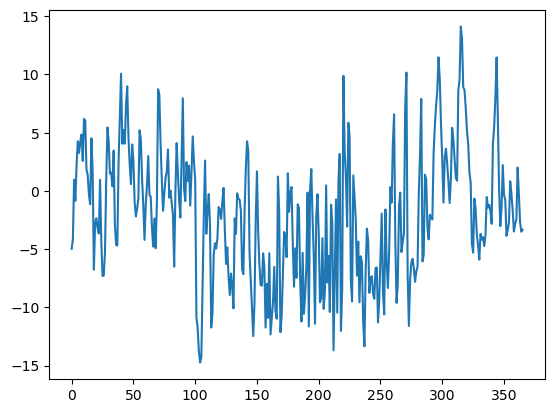

In [11]:
open_file(path="/Users/paolo/Documents/TC_old/data/data_new_samples/20200101_20201231.grb", eng='cfgrib', backed=True, key='v', multiple=True, multiple_value=200.0)


                               number   step  isobaricInhPa valid_time  \
time       latitude longitude                                            
1980-01-01  90.0    -180.0          0 0 days          700.0 1980-01-01   
                    -177.5          0 0 days          700.0 1980-01-01   
                    -175.0          0 0 days          700.0 1980-01-01   
                    -172.5          0 0 days          700.0 1980-01-01   
                    -170.0          0 0 days          700.0 1980-01-01   
...                               ...    ...            ...        ...   
1980-12-31 -90.0     167.5          0 0 days          700.0 1980-12-31   
                     170.0          0 0 days          700.0 1980-12-31   
                     172.5          0 0 days          700.0 1980-12-31   
                     175.0          0 0 days          700.0 1980-12-31   
                     177.5          0 0 days          700.0 1980-12-31   

                                     

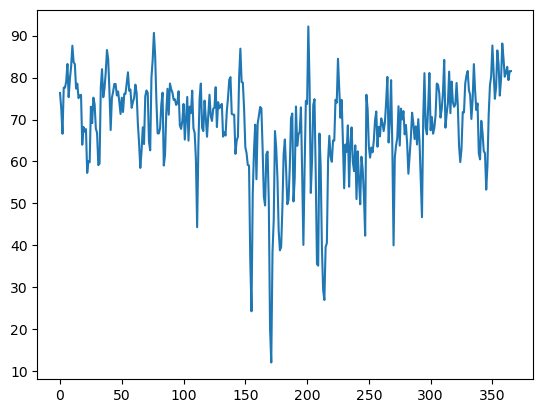

In [51]:
open_file(path="/Users/paolo/Documents/TC_old/data/data_new_samples/19800101_19801231.grb", eng='cfgrib', backed=True, key='r')


                                             number   step valid_time  \
time       isobaricInhPa latitude longitude                             
1980-01-01 850.0          90.0    -180.0          0 0 days 1980-01-01   
                                  -177.5          0 0 days 1980-01-01   
                                  -175.0          0 0 days 1980-01-01   
                                  -172.5          0 0 days 1980-01-01   
                                  -170.0          0 0 days 1980-01-01   
...                                             ...    ...        ...   
1980-12-31 200.0         -90.0     167.5          0 0 days 1980-12-31   
                                   170.0          0 0 days 1980-12-31   
                                   172.5          0 0 days 1980-12-31   
                                   175.0          0 0 days 1980-12-31   
                                   177.5          0 0 days 1980-12-31   

                                                  

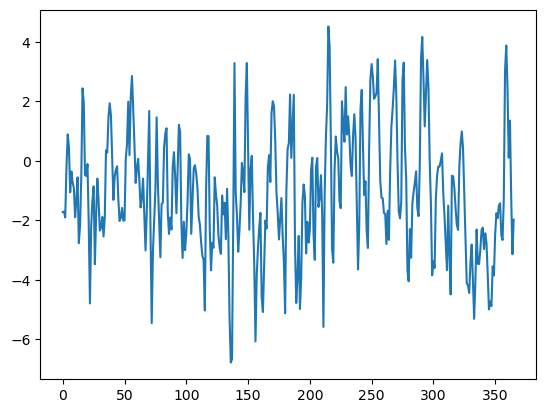

In [53]:
open_file(path="/Users/paolo/Documents/TC_old/data/data_new_samples/19800101_19801231.grb", eng='cfgrib', backed=True, key='u', multiple=True, multiple_value=850.0)


                                             number   step valid_time  \
time       isobaricInhPa latitude longitude                             
1980-01-01 850.0          90.0    -180.0          0 0 days 1980-01-01   
                                  -177.5          0 0 days 1980-01-01   
                                  -175.0          0 0 days 1980-01-01   
                                  -172.5          0 0 days 1980-01-01   
                                  -170.0          0 0 days 1980-01-01   
...                                             ...    ...        ...   
1980-12-31 200.0         -90.0     167.5          0 0 days 1980-12-31   
                                   170.0          0 0 days 1980-12-31   
                                   172.5          0 0 days 1980-12-31   
                                   175.0          0 0 days 1980-12-31   
                                   177.5          0 0 days 1980-12-31   

                                                  

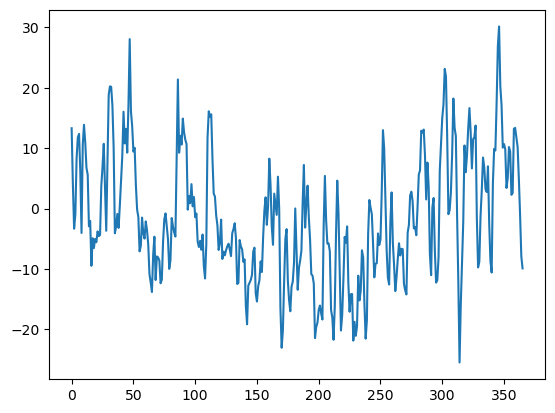

In [55]:
open_file(path="/Users/paolo/Documents/TC_old/data/data_new_samples/19800101_19801231.grb", eng='cfgrib', backed=True, key='u', multiple=True, multiple_value=200.0)


                                             number   step valid_time  \
time       isobaricInhPa latitude longitude                             
1980-01-01 850.0          90.0    -180.0          0 0 days 1980-01-01   
                                  -177.5          0 0 days 1980-01-01   
                                  -175.0          0 0 days 1980-01-01   
                                  -172.5          0 0 days 1980-01-01   
                                  -170.0          0 0 days 1980-01-01   
...                                             ...    ...        ...   
1980-12-31 200.0         -90.0     167.5          0 0 days 1980-12-31   
                                   170.0          0 0 days 1980-12-31   
                                   172.5          0 0 days 1980-12-31   
                                   175.0          0 0 days 1980-12-31   
                                   177.5          0 0 days 1980-12-31   

                                                  

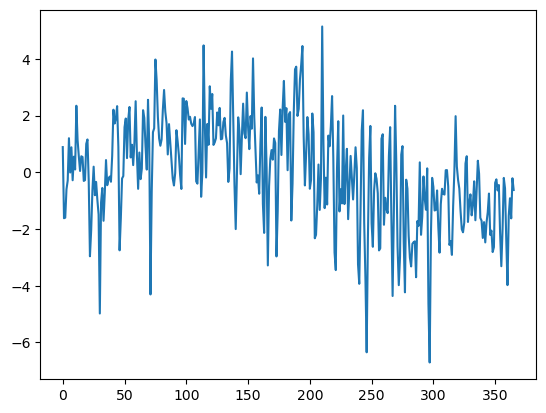

In [57]:
open_file(path="/Users/paolo/Documents/TC_old/data/data_new_samples/19800101_19801231.grb", eng='cfgrib', backed=True, key='v', multiple=True, multiple_value=850.0)


                                             number   step valid_time  \
time       isobaricInhPa latitude longitude                             
1980-01-01 850.0          90.0    -180.0          0 0 days 1980-01-01   
                                  -177.5          0 0 days 1980-01-01   
                                  -175.0          0 0 days 1980-01-01   
                                  -172.5          0 0 days 1980-01-01   
                                  -170.0          0 0 days 1980-01-01   
...                                             ...    ...        ...   
1980-12-31 200.0         -90.0     167.5          0 0 days 1980-12-31   
                                   170.0          0 0 days 1980-12-31   
                                   172.5          0 0 days 1980-12-31   
                                   175.0          0 0 days 1980-12-31   
                                   177.5          0 0 days 1980-12-31   

                                                  

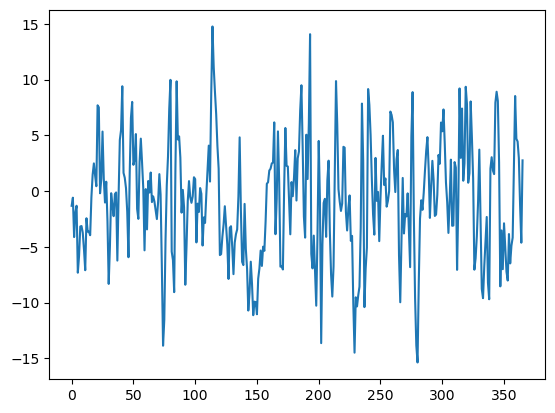

In [59]:
open_file(path="/Users/paolo/Documents/TC_old/data/data_new_samples/19800101_19801231.grb", eng='cfgrib', backed=True, key='v', multiple=True, multiple_value=200.0)


# 2) SST

1 variabile, dati giornalieri per ciascuna combinazione latitudine-longitudine (10.512 diverse ma 6.990 non nulli, il resto è terraferma).

                               number   step  surface valid_time         sst
time       latitude longitude                                               
1980-01-01  90.0    -180.0          0 0 days      0.0 1980-01-01  271.459717
                    -177.5          0 0 days      0.0 1980-01-01  271.459717
                    -175.0          0 0 days      0.0 1980-01-01  271.459717
                    -172.5          0 0 days      0.0 1980-01-01  271.459717
                    -170.0          0 0 days      0.0 1980-01-01  271.459717
...                               ...    ...      ...        ...         ...
1980-12-31 -90.0     167.5          0 0 days      0.0 1980-12-31         NaN
                     170.0          0 0 days      0.0 1980-12-31         NaN
                     172.5          0 0 days      0.0 1980-12-31         NaN
                     175.0          0 0 days      0.0 1980-12-31         NaN
                     177.5          0 0 days      0.0 1980-12-31         NaN

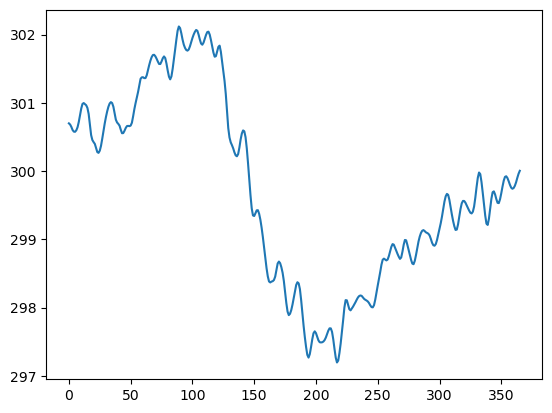

In [62]:
open_file(path="/Users/paolo/Documents/TC_old/data/data_new_samples/2d_sst_trop_19800101_19801231.grb", eng='cfgrib', backed=False, key='sst', multiple=False)


# 3) Top thermal radiation

### 1 variabile, dati giornalieri per ciascuna combinazione latitudine-longitudine (10.512 diverse).

                               number   step  surface valid_time         ttr
time       latitude longitude                                               
1980-01-01  90.0    0.0             0 1 days      0.0 1980-01-02 -174.216293
                    2.5             0 1 days      0.0 1980-01-02 -174.216293
                    5.0             0 1 days      0.0 1980-01-02 -173.908142
                    7.5             0 1 days      0.0 1980-01-02 -173.706665
                    10.0            0 1 days      0.0 1980-01-02 -173.662216
...                               ...    ...      ...        ...         ...
1980-12-31 -90.0    347.5           0 1 days      0.0 1981-01-01 -186.955933
                    350.0           0 1 days      0.0 1981-01-01 -186.985550
                    352.5           0 1 days      0.0 1981-01-01 -187.015182
                    355.0           0 1 days      0.0 1981-01-01 -187.121857
                    357.5           0 1 days      0.0 1981-01-01 -187.252228

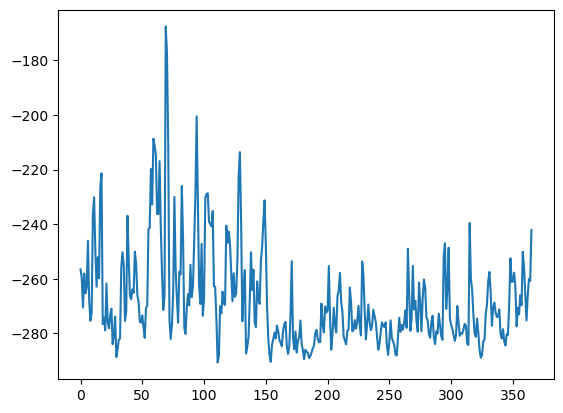

In [77]:
open_file(path="/Users/paolo/Documents/TC_old/data/data_new_samples/an_19800101_19801231_25.grb", eng='cfgrib', backed=False, key='ttr', multiple=False)


# 4) Target

1 variabile, dati giornalieri per ciascuna combinazione latitudine-longitudine (377 diverse) per ciascuno dei 14580 giorni dall'1-1-1980 all'1-12-2019. Valori: 5.485.668 volte è 0, 10.992 è 1.

                               number   step  surface valid_time  lsm
time       latitude longitude                                        
1980-01-01  0.0     20.0            0 0 days      0.0 1980-01-01  0.0
                    22.5            0 0 days      0.0 1980-01-01  0.0
                    25.0            0 0 days      0.0 1980-01-01  0.0
                    27.5            0 0 days      0.0 1980-01-01  0.0
                    30.0            0 0 days      0.0 1980-01-01  0.0
...                               ...    ...      ...        ...  ...
1980-12-31 -30.0    80.0            0 0 days      0.0 1980-12-31  0.0
                    82.5            0 0 days      0.0 1980-12-31  0.0
                    85.0            0 0 days      0.0 1980-12-31  0.0
                    87.5            0 0 days      0.0 1980-12-31  0.0
                    90.0            0 0 days      0.0 1980-12-31  0.0

[137982 rows x 5 columns]
[0]
[0]
            latitude  longitude  lsm
time              

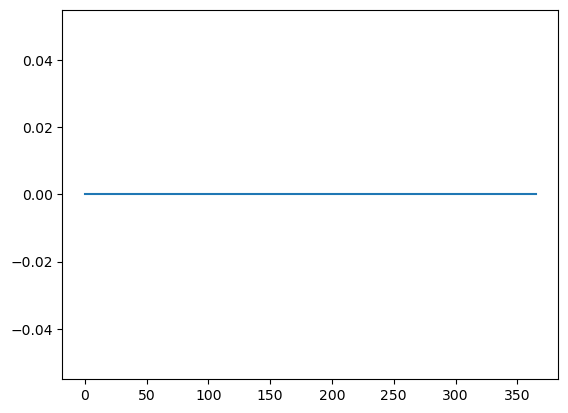

In [76]:
open_file(path="/Users/paolo/Documents/TC_old/data/data_new_samples/tcact_sin_year/actmask_hist_300km_17ms_sin_1980.grb", eng='cfgrib', backed=False, key='lsm', multiple=False, lon=20)


In [33]:
ds = xr.open_dataset("/Users/paolo/Documents/TC_old/data/data_new_samples/tcact_sin_year/actmask_hist_300km_17ms_sin_1980.grb", engine='cfgrib')
        
gpi_bidim = ds.to_dataframe()
gpi_bidim = gpi_bidim.reset_index()
print(gpi_bidim.latitude.unique())
print(gpi_bidim.longitude.unique())

red_gpi_bidim_old = gpi_bidim.loc[(gpi_bidim.latitude>=-30) & (gpi_bidim.latitude<=0) & (gpi_bidim.longitude>=20) & (gpi_bidim.longitude<=90) & (gpi_bidim.lsm>0)]


[  0.   -2.5  -5.   -7.5 -10.  -12.5 -15.  -17.5 -20.  -22.5 -25.  -27.5
 -30. ]
[20.  22.5 25.  27.5 30.  32.5 35.  37.5 40.  42.5 45.  47.5 50.  52.5
 55.  57.5 60.  62.5 65.  67.5 70.  72.5 75.  77.5 80.  82.5 85.  87.5
 90. ]


In [34]:
ds = xr.open_dataset("/Users/paolo/Desktop/TC_target/2.5col_obs_1980_48_17.grb", engine='cfgrib')
        
gpi_bidim = ds.to_dataframe().reset_index()
red_gpi_bidim = gpi_bidim.loc[(gpi_bidim.latitude>=-30) & (gpi_bidim.latitude<=0) & (gpi_bidim.longitude>=20) & (gpi_bidim.longitude<=90) & (gpi_bidim.p131089>0)]


In [56]:
import numpy as np
red_gpi_bidim

,time,latitude,longitude,number,step,surface,valid_time,p131089
163965,1980-01-16,-17.5,52.5,0,0 days,0.0,1980-01-16,7.5
163966,1980-01-16,-17.5,55.0,0,0 days,0.0,1980-01-16,59.5
163967,1980-01-16,-17.5,57.5,0,0 days,0.0,1980-01-16,73.0
163968,1980-01-16,-17.5,60.0,0,0 days,0.0,1980-01-16,11.0
164109,1980-01-16,-20.0,52.5,0,0 days,0.0,1980-01-16,40.0
...,...,...,...,...,...,...,...,...
3306777,1980-11-10,-12.5,82.5,0,0 days,0.0,1980-11-10,100.0
3306778,1980-11-10,-12.5,85.0,0,0 days,0.0,1980-11-10,15.5
3306919,1980-11-10,-15.0,77.5,0,0 days,0.0,1980-11-10,21.5
3306920,1980-11-10,-15.0,80.0,0,0 days,0.0,1980-11-10,77.5


                               number   step  surface valid_time  p131089
time       latitude longitude                                            
1980-01-01  90.0    -180.0          0 0 days      0.0 1980-01-01      0.0
                    -177.5          0 0 days      0.0 1980-01-01      0.0
                    -175.0          0 0 days      0.0 1980-01-01      0.0
                    -172.5          0 0 days      0.0 1980-01-01      0.0
                    -170.0          0 0 days      0.0 1980-01-01      0.0
...                               ...    ...      ...        ...      ...
1980-12-31 -90.0     167.5          0 0 days      0.0 1980-12-31      0.0
                     170.0          0 0 days      0.0 1980-12-31      0.0
                     172.5          0 0 days      0.0 1980-12-31      0.0
                     175.0          0 0 days      0.0 1980-12-31      0.0
                     177.5          0 0 days      0.0 1980-12-31      0.0

[3847392 rows x 5 columns]
[0]
[0]
  

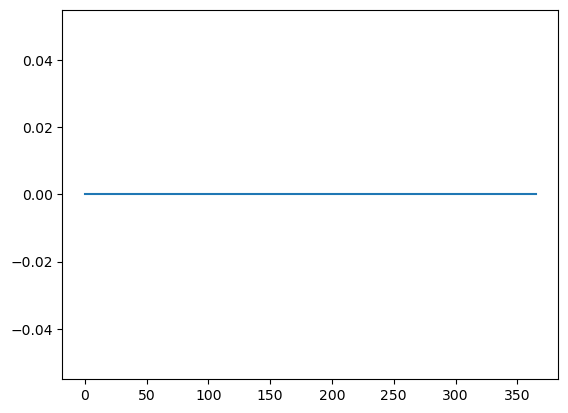

In [17]:
open_file(path="/Users/paolo/Desktop/TC_target/2.5col_obs_1980_48_17.grb", eng='cfgrib', backed=False, key='p131089', multiple=False, lon=20)


# check

                               number   step  surface valid_time  lsm
time       latitude longitude                                        
1980-01-01  0.0     20.0            0 0 days      0.0 1980-01-01  0.0
                    22.5            0 0 days      0.0 1980-01-01  0.0
                    25.0            0 0 days      0.0 1980-01-01  0.0
                    27.5            0 0 days      0.0 1980-01-01  0.0
                    30.0            0 0 days      0.0 1980-01-01  0.0
...                               ...    ...      ...        ...  ...
1980-12-31 -30.0    80.0            0 0 days      0.0 1980-12-31  0.0
                    82.5            0 0 days      0.0 1980-12-31  0.0
                    85.0            0 0 days      0.0 1980-12-31  0.0
                    87.5            0 0 days      0.0 1980-12-31  0.0
                    90.0            0 0 days      0.0 1980-12-31  0.0

[137982 rows x 5 columns]
[0]
[0]
            latitude  longitude  lsm
time              

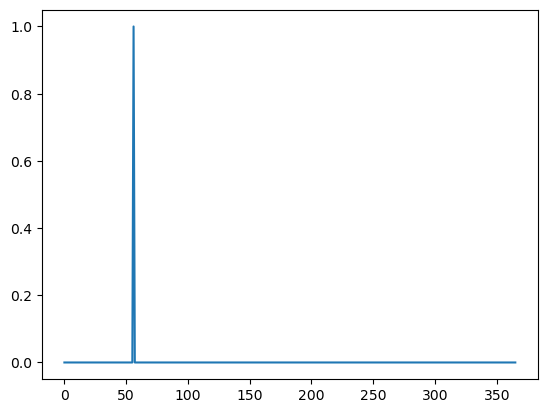

In [99]:
open_file(path="/Users/paolo/Documents/TC_old/data/data_new_samples/tcact_sin_year/actmask_hist_300km_17ms_sin_1980.grb", eng='cfgrib', backed=False, key='lsm', multiple=False, lat=-17.5, lon=85)


                    number       time   step  surface valid_time  lsm
latitude longitude                                                   
 90.0    -180.0          0 2023-02-13 0 days      0.0 2023-02-13  1.0
         -177.5          0 2023-02-13 0 days      0.0 2023-02-13  1.0
         -175.0          0 2023-02-13 0 days      0.0 2023-02-13  1.0
         -172.5          0 2023-02-13 0 days      0.0 2023-02-13  1.0
         -170.0          0 2023-02-13 0 days      0.0 2023-02-13  1.0
...                    ...        ...    ...      ...        ...  ...
-90.0     167.5          0 2023-02-13 0 days      0.0 2023-02-13  0.0
          170.0          0 2023-02-13 0 days      0.0 2023-02-13  0.0
          172.5          0 2023-02-13 0 days      0.0 2023-02-13  0.0
          175.0          0 2023-02-13 0 days      0.0 2023-02-13  0.0
          177.5          0 2023-02-13 0 days      0.0 2023-02-13  0.0

[10512 rows x 6 columns]
[0]
[0]
            latitude  longitude    lsm
time             

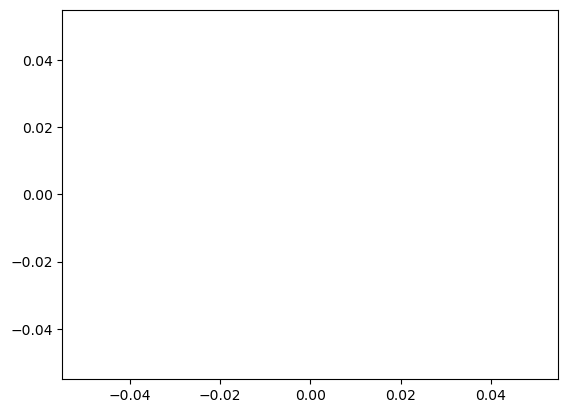

In [3]:
open_file(path="/Users/paolo/Desktop/2.5_lsm.grb", eng='cfgrib', backed=False, key='lsm', multiple=False, lon=20)


In [2]:
path="/Users/paolo/Documents/TC_old/data/data_new_samples/19800101_19801231.grb"
eng='cfgrib'
backed=True 
key='r'
ds = xr.open_dataset(path, engine=eng, backend_kwargs={'filter_by_keys': {'shortName': key}})


In [3]:
ds

<xarray.Dataset>
Dimensions:        (time: 366, latitude: 73, longitude: 144)
Coordinates:
    number         int64 ...
  * time           (time) datetime64[ns] 1980-01-01 1980-01-02 ... 1980-12-31
    step           timedelta64[ns] ...
    isobaricInhPa  float64 ...
  * latitude       (latitude) float64 90.0 87.5 85.0 82.5 ... -85.0 -87.5 -90.0
  * longitude      (longitude) float64 -180.0 -177.5 -175.0 ... 175.0 177.5
    valid_time     (time) datetime64[ns] ...
Data variables:
    r              (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2022-10-11T10:51 GRIB to CDM+CF via cfgrib-0.9.1...

# V2 feature extraction

In [3]:
ds = xr.open_dataset('/Users/paolo/Desktop/tc_fullDataset/2d_clint_19800101_19801231.grb')

skipping variable: paramId==157 shortName='r'
Traceback (most recent call last):
  File "/Users/paolo/opt/miniconda3/envs/xarray/lib/python3.10/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/Users/paolo/opt/miniconda3/envs/xarray/lib/python3.10/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='isobaricInhPa' value=Variable(dimensions=(), data=850.0) new_value=Variable(dimensions=(), data=700.0)
skipping variable: paramId==131 shortName='u'
Traceback (most recent call last):
  File "/Users/paolo/opt/miniconda3/envs/xarray/lib/python3.10/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/Users/paolo/opt/miniconda3/envs/xarray/lib/python3.10/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dat

In [4]:
list(ds.coords)

['number',
 'time',
 'step',
 'isobaricInhPa',
 'latitude',
 'longitude',
 'valid_time',
 'surface']

In [5]:
list(ds.keys())

['vo', 'sst', 'tcwv', 'tclw', 'tciw']

In [11]:
ds.loc[ds.latitude>=0]

TypeError: can only lookup dictionaries from Dataset.loc